# Importing Necessary libraries

In [1]:
# Importing required modules
import pandas as pd
import numpy as np               # For mathematical calculations
import matplotlib.pyplot as plt  # For plotting graphs
import datetime as dt
import statsmodels.api as sm    # To explore data
from datetime import datetime    # To access datetime
from pandas import Series        # To work on series
%matplotlib inline
from statsmodels.tsa.vector_ar.var_model import VAR
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from math import sqrt
from sklearn.metrics import mean_squared_error
import warnings                   # To ignore the warnings
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
#Loading ADANIPORTS stock data from CSV.
df = pd.read_csv('ADANIPORTS.NS.csv')

In [3]:
#Top 5 instances of the dataset 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-01,285.799988,287.549988,276.299988,286.500000,271.877838,3598155.0
1,2014-09-02,285.899994,291.500000,285.899994,288.850006,274.107880,2060621.0
2,2014-09-03,290.149994,294.950012,287.950012,289.100006,274.345184,2780904.0
3,2014-09-04,289.100006,292.899994,286.399994,289.299988,274.534943,5686505.0
4,2014-09-05,290.799988,292.899994,286.399994,290.149994,275.341553,1540290.0


# Data Preprocessing

# Data Cleaning

In [4]:
#Checking for missing values in the dataset.
null_values = df.isna().sum()

In [5]:
#Printing te null values
print(null_values)

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64


In [6]:
#Dropping null values
df = df.dropna()

In [7]:
#Check duplicate entries
duplicate_value = df.duplicated().sum()

In [8]:
#Print Duplicate entries
print(duplicate_value)

0


# Feature Engineering

In [9]:
#Informatory Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2463 entries, 0 to 2463
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2463 non-null   object 
 1   Open       2463 non-null   float64
 2   High       2463 non-null   float64
 3   Low        2463 non-null   float64
 4   Close      2463 non-null   float64
 5   Adj Close  2463 non-null   float64
 6   Volume     2463 non-null   float64
dtypes: float64(6), object(1)
memory usage: 153.9+ KB


In [10]:
# Convert string to datetime64
df['Date'] = df['Date'].apply(pd.to_datetime)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-01,285.799988,287.549988,276.299988,286.500000,271.877838,3598155.0
1,2014-09-02,285.899994,291.500000,285.899994,288.850006,274.107880,2060621.0
2,2014-09-03,290.149994,294.950012,287.950012,289.100006,274.345184,2780904.0
3,2014-09-04,289.100006,292.899994,286.399994,289.299988,274.534943,5686505.0
4,2014-09-05,290.799988,292.899994,286.399994,290.149994,275.341553,1540290.0


# EDA

In [11]:
#Shape of dataset
df.shape

(2463, 7)

In [12]:
#Columns in the dataset
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [13]:
#Informatory Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2463 entries, 0 to 2463
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2463 non-null   datetime64[ns]
 1   Open       2463 non-null   float64       
 2   High       2463 non-null   float64       
 3   Low        2463 non-null   float64       
 4   Close      2463 non-null   float64       
 5   Adj Close  2463 non-null   float64       
 6   Volume     2463 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 153.9 KB


In [14]:
#Descriptive Analysis
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2463,2463.000000,2463.000000,2463.000000,2463.000000,2463.000000,2.463000e+03
mean,2019-09-02 00:12:51.741778432,528.059907,535.624483,519.050547,527.131486,515.313470,5.582826e+06
min,2014-09-01 00:00:00,171.600006,180.399994,169.149994,171.550003,164.050232,0.000000e+00
25%,2017-03-06 12:00:00,324.149994,328.949997,319.000000,323.599991,309.375290,2.510088e+06
50%,2019-09-05 00:00:00,384.549988,389.000000,378.600006,384.450012,369.847565,3.648076e+06
75%,2022-02-26 12:00:00,731.950012,742.000000,721.824982,730.649994,718.168854,5.876788e+06
max,2024-08-29 00:00:00,1580.949951,1621.400024,1568.500000,1590.150024,1590.150024,1.155175e+08
std,NaN,301.215628,304.918707,296.507127,300.467921,302.717899,7.126248e+06


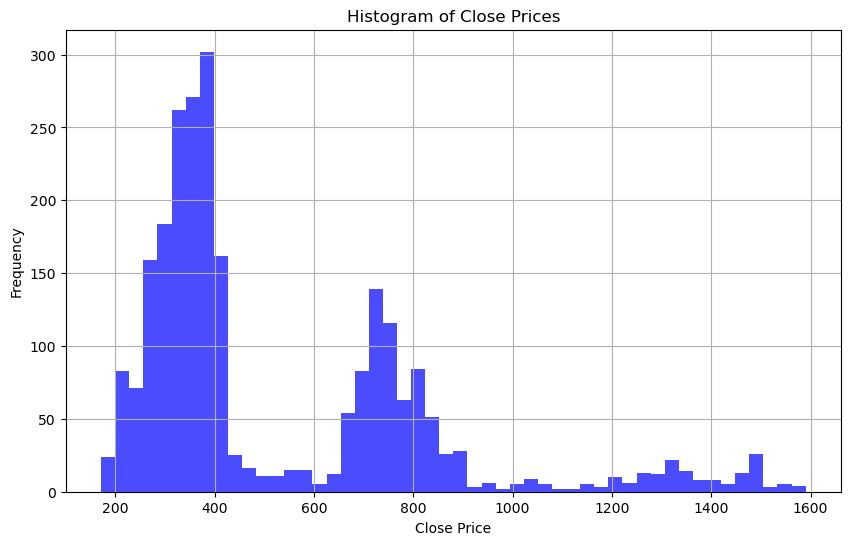

In [15]:
# Create a histogram for the 'Close' column
plt.figure(figsize=(10, 6))
plt.hist(df['Close'], bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Check for Stationarity


**Stationarity Check for the 'Close' Colum**

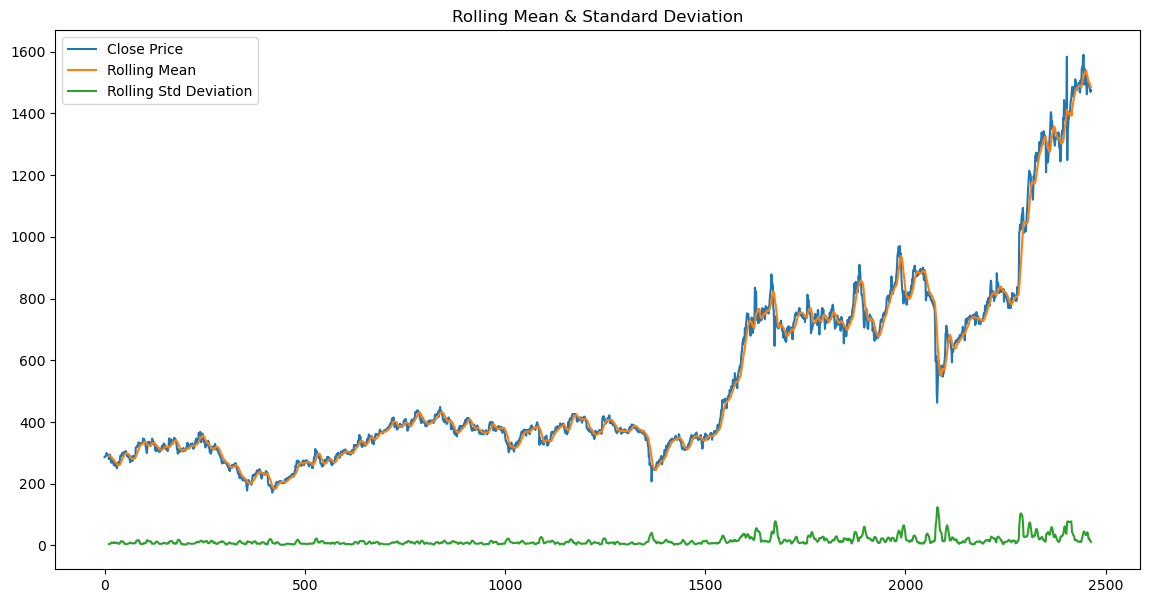

In [16]:
# Plotting the Closing prices along with rolling statistics
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['Close'].rolling(window=12).mean(), label='Rolling Mean')  # 12 can be adjusted
plt.plot(df['Close'].rolling(window=12).std(), label='Rolling Std Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

The provided chart showcases the 'Close Price' of a stock alongside its rolling mean and standard deviation. The rolling mean closely tracks the close price, indicating trends over time, while the rolling standard deviation remains relatively low, suggesting limited volatility in how widely the prices vary around the mean.

In [17]:
# Perform Augmented Dickey-Fuller test:
result = sm.tsa.adfuller(df['Close'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

# Interpretation of results
if result[1] < 0.05:
    print("Evidence suggests that the time series is stationary.")
else:
    print("Evidence suggests that the time series is not stationary.")

ADF Statistic: 1.02462865187541
p-value: 0.9945191306316582
Critical Values:
	1%: -3.4330328659222165
	5%: -2.8627252631029694
	10%: -2.5674009636186508
Evidence suggests that the time series is not stationary.


The Augmented Dickey-Fuller (ADF) test results, with a statistic of 1.0246 and a p-value of 0.9945, indicate non-stationarity within the dataset. All critical values (1%, 5%, and 10%) significantly exceed the ADF statistic, confirming the non-rejection of the null hypothesis that the time series has a unit root, hence is non-stationary.

This non-stationarity could be due to trends, seasonality, or cyclic behavior in the data, which are observable as the upward movement in the rolling mean over time. For effective time series analysis and forecasting using models like ARIMA, transforming the data to achieve stationarity is essential. Techniques such as differencing, logarithmic or power transformations, or detrending might be required before applying statistical or machine learning models to predict future stock prices reliably.

**Stationarity Check for the 'Adj Close' Colum**

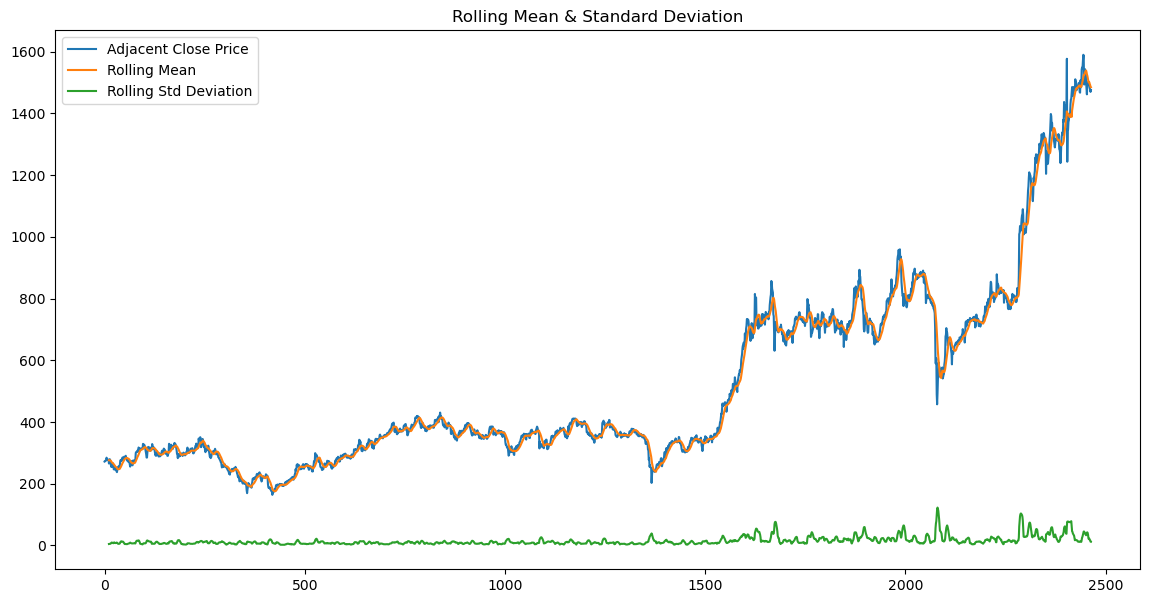

In [18]:
# Plotting the Closing prices along with rolling statistics
plt.figure(figsize=(14, 7))
plt.plot(df['Adj Close'], label='Adjacent Close Price')
plt.plot(df['Adj Close'].rolling(window=12).mean(), label='Rolling Mean')  # 12 can be adjusted
plt.plot(df['Adj Close'].rolling(window=12).std(), label='Rolling Std Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [19]:
# Perform Augmented Dickey-Fuller test:
result = sm.tsa.adfuller(df['Adj Close'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values:')
for key, value in result[4].items():
    print(f'\t{key}: {value}')

# Interpretation of results
if result[1] < 0.05:
    print("Evidence suggests that the time series is stationary.")
else:
    print("Evidence suggests that the time series is not stationary.")

ADF Statistic: 1.1133508403986985
p-value: 0.995328971224625
Critical Values:
	1%: -3.4330328659222165
	5%: -2.8627252631029694
	10%: -2.5674009636186508
Evidence suggests that the time series is not stationary.


The time series analysis of the "Adjacent Close Price" along with its rolling mean and standard deviation reveals a distinct trend upwards, suggesting significant non-stationarity. The Augmented Dickey-Fuller test confirms this with an ADF statistic of 1.1134 and a p-value of 0.9953, both strongly indicating the presence of a unit root. Critical values for 1%, 5%, and 10% confidence levels are far more negative compared to the ADF statistic, reinforcing the test's conclusion. This persistent trend and non-stationarity mean that typical assumptions of time series analysis for stationarity-based models like ARIMA are violated, necessitating differencing or transformations (e.g., logarithmic) to stabilize the mean and variance before effective modeling and forecasting can be pursued.

# Conversion of Close from non Stationary to Stationary

In [20]:
#Calculating log and first differences of Close prices.
df['Log_Close'] = np.log(df['Close'])
df['Log_Diff'] = df['Log_Close'].diff()

In [21]:
#Performing ADF test on log-differenced data to check stationarity.
log_diff = df['Log_Diff'].dropna()  # Removing NA values created by differencing
result = sm.tsa.adfuller(log_diff, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')


ADF Statistic: -20.96194965706786
p-value: 0.0


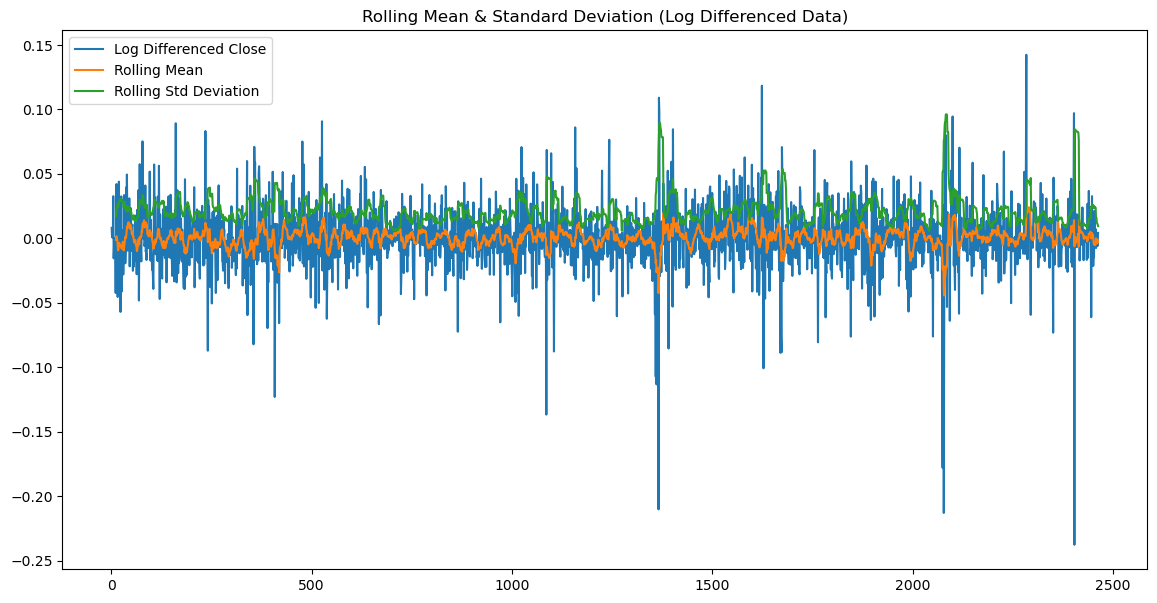

In [22]:
#Plotting rolling statistics for log-differenced stock prices.
plt.figure(figsize=(14, 7))
plt.plot(log_diff, label='Log Differenced Close')
plt.plot(log_diff.rolling(window=12).mean(), label='Rolling Mean')
plt.plot(log_diff.rolling(window=12).std(), label='Rolling Std Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation (Log Differenced Data)')
plt.show()

The transformation process depicted converts the non-stationary "Close" price series into a stationary series using logarithmic transformation followed by differencing. Initially, the logarithm of the "Close" prices is taken to stabilize the variance. Subsequent first differencing of these log values reduces trend effects, yielding a series more suitable for time series forecasting models that assume stationarity. The Augmented Dickey-Fuller test confirms stationarity with an ADF statistic of -20.9619 and a p-value of 0.0, strongly rejecting the null hypothesis of a unit root. The resulting plot shows fluctuations around a mean of zero, consistent with a stationary process.

# ACF and PACF

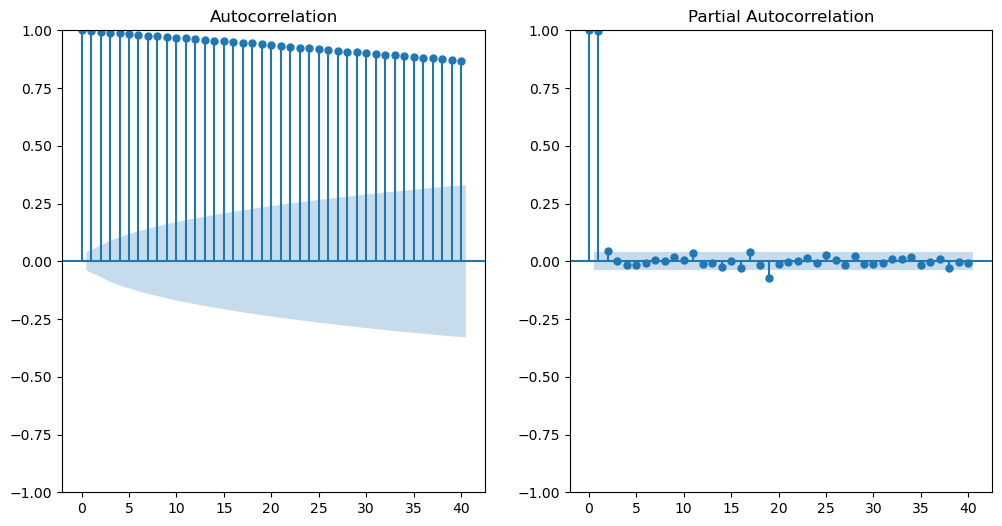

In [23]:
# Plot ACF and PACF
plt.figure(figsize=(12, 6))
plt.subplot(121)
plot_acf(df['Close'], ax=plt.gca(), lags=40)

plt.subplot(122)
plot_pacf(df['Close'], ax=plt.gca(), lags=40)
plt.show()


The Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots for the transformed data reveal key insights into its properties. The ACF shows a gradual decline but remains within the significance bounds, suggesting that the data exhibits some level of lingering autocorrelation. In contrast, the PACF plot quickly cuts off after the first lag, indicating that only one prior value has a significant linear relationship with the current value, pointing towards a potential AR(1) process. This behavior is typical for data that may require an autoregressive model to capture its dynamics effectively.

# Data Splitting

In [24]:
#Setting 'Date' as the index for the DataFrame.
df.set_index('Date', inplace=True)

In [25]:
# Define the split date
split_date = pd.to_datetime("2022-08-01")  # Adjusted to the correct format

# Split the data into training and testing sets
train = df[df.index <= split_date]['Close']  # Include the split date in training
test = df[df.index > split_date]['Close']  # Data after the split date in testing

In [26]:
# You can print the first few entries to verify the splits
print("Training Data:")
print(train.head())
print("\nTesting Data:")
print(test.head())

Training Data:
Date
2014-09-01    286.500000
2014-09-02    288.850006
2014-09-03    289.100006
2014-09-04    289.299988
2014-09-05    290.149994
Name: Close, dtype: float64

Testing Data:
Date
2022-08-02    802.299988
2022-08-03    807.200012
2022-08-04    807.250000
2022-08-05    810.250000
2022-08-08    801.650024
Name: Close, dtype: float64


In [27]:
#Shape of training data
train.shape

(1953,)

In [28]:
#Shape of testing data
test.shape

(510,)

# Time Series Models

# AutoReg

In [29]:
# Fit an AR model with an appropriate number of lags
model = AutoReg(train, lags=15)
model_fitted = model.fit()

In [30]:
# Print the summary of the model
print(model_fitted.summary())

                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 1953
Model:                    AutoReg(15)   Log Likelihood               -7272.064
Method:               Conditional MLE   S.D. of innovations             10.313
Date:                Thu, 29 Aug 2024   AIC                          14578.129
Time:                        23:05:56   BIC                          14672.809
Sample:                            15   HQIC                         14612.949
                                 1953                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3945      0.626      0.630      0.529      -0.833       1.622
Close.L1       1.0111      0.023     44.370      0.000       0.966       1.056
Close.L2      -0.0483      0.032     -1.491      0.1

In [31]:
# Make predictions
start = len(train)
end = len(train) + len(test) - 1
predictions = model_fitted.predict(start=start, end=end, dynamic=False)

# Prepare predictions for comparison
predictions.index = test.index

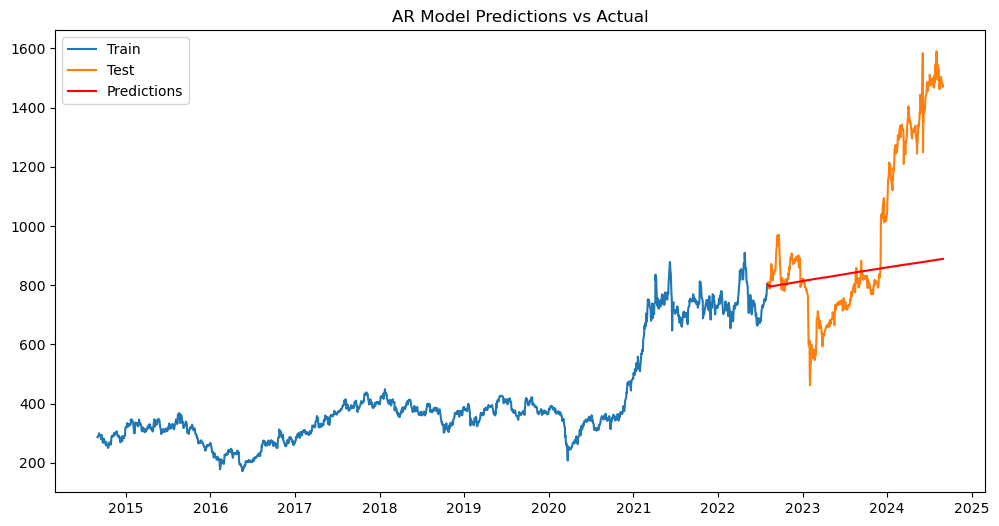

In [32]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predictions.index, predictions, label='Predictions', color='red')
plt.title('AR Model Predictions vs Actual')
plt.legend()
plt.show()

In [33]:
# Calculate MSE
mse = mean_squared_error(test, predictions)
print(f"Mean Squared Error: {mse}")
rmse = sqrt(mse)
print("RMSE: ",rmse)


Mean Squared Error: 87405.29120977354
RMSE:  295.6438587384719


# ARIMA

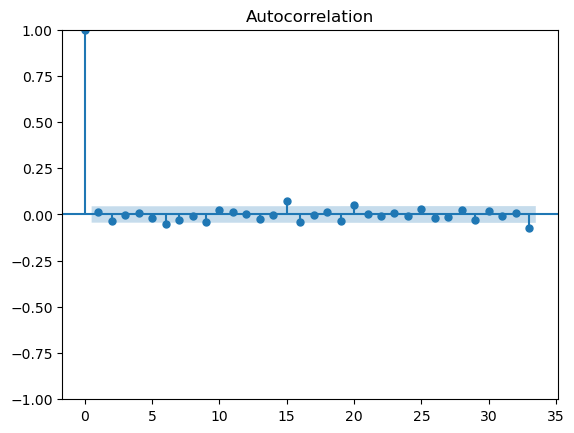

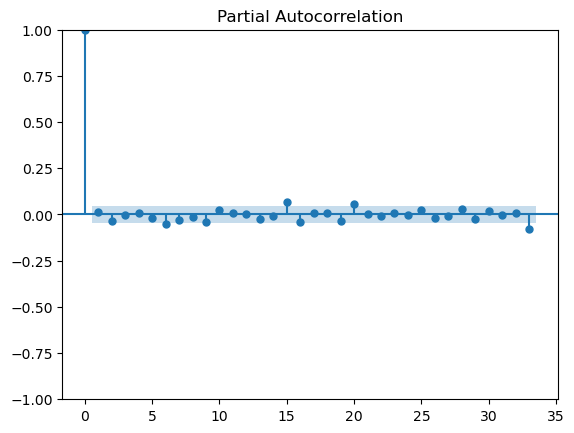

In [34]:
plot_acf(train.diff().dropna())  # ACF for differenced data
plot_pacf(train.diff().dropna()) # PACF for differenced data
plt.show()

In [35]:
# Fit an ARIMA model
model = ARIMA(train, order=(0, 1, 0))  # Adjust p, d, q based on your analysis
fitted_model = model.fit()

# Print out the model summary
print(fitted_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1953
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -7329.302
Date:                Thu, 29 Aug 2024   AIC                          14660.603
Time:                        23:05:56   BIC                          14666.180
Sample:                             0   HQIC                         14662.654
                               - 1953                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       106.8751      1.366     78.244      0.000     104.198     109.552
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):              9107.00
Prob(Q):                              0.58   Pr

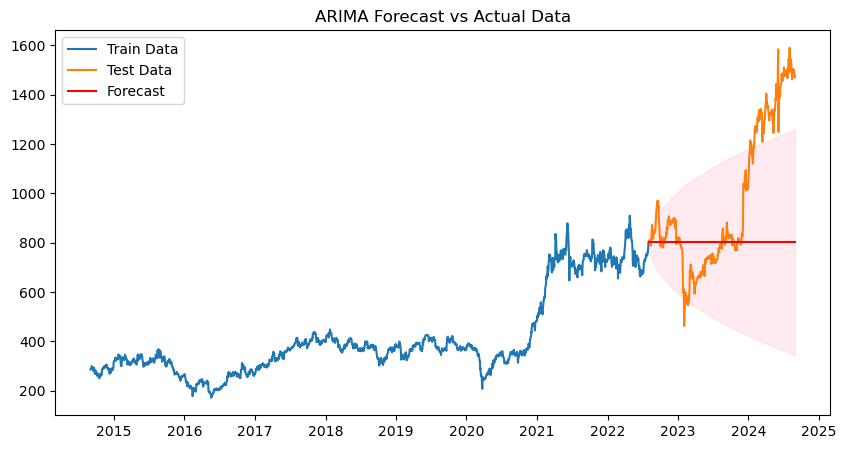

In [36]:
# Forecast
forecasts = fitted_model.get_forecast(steps=len(test))
mean_forecast = forecasts.predicted_mean
conf_int = forecasts.conf_int()

# Plot the forecast alongside the data
plt.figure(figsize=(10, 5))
plt.plot(train.index, train, label='Train Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, mean_forecast, label='Forecast', color='red')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Forecast vs Actual Data')
plt.legend()
plt.show()


In [37]:
# Calculate MSE
mse = mean_squared_error(test, mean_forecast)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 111093.43742900551


# SARIMA

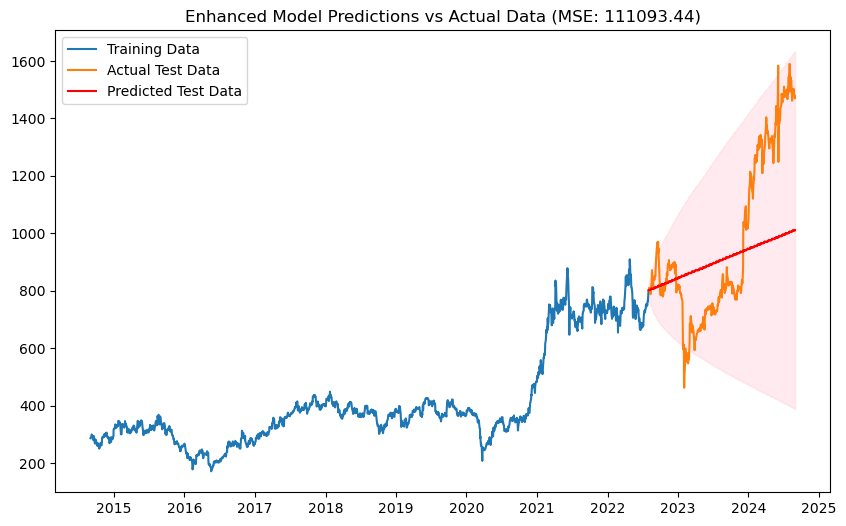

In [38]:
#Fit SARIMA Model
model = SARIMAX(train, order=(1,1,1), seasonal_order=(1,1,1,12))  # Example: simple SARIMA
model_fit = model.fit(disp=False)

# Make prediction
prediction = model_fit.get_forecast(steps=len(test))
predicted_mean = prediction.predicted_mean
conf_int = prediction.conf_int()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Actual Test Data')
plt.plot(test.index, predicted_mean, label='Predicted Test Data', color='red')
plt.fill_between(test.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.legend()
plt.title(f'Enhanced Model Predictions vs Actual Data (MSE: {mse:.2f})')
plt.show()

In [39]:
# Calculate error metrics
mse = mean_squared_error(test, predicted_mean)
print(f"Mean Squared Error: {mse}")
rmse = sqrt(mse)
print("RMSE: ",rmse)

Mean Squared Error: 62961.96949753561
RMSE:  250.9222379494006


# Predicting Stock

In [40]:
future_dates = pd.date_range(start='2024-08-01', end='2026-08-01', freq='D')

# Forecast for the defined date range
future_forecast = model_fit.get_forecast(steps=len(future_dates))
future_mean = future_forecast.predicted_mean
future_conf_int = future_forecast.conf_int()

# Assign the forecasted mean and intervals proper date indices
future_mean.index = future_dates
future_conf_int.index = future_dates

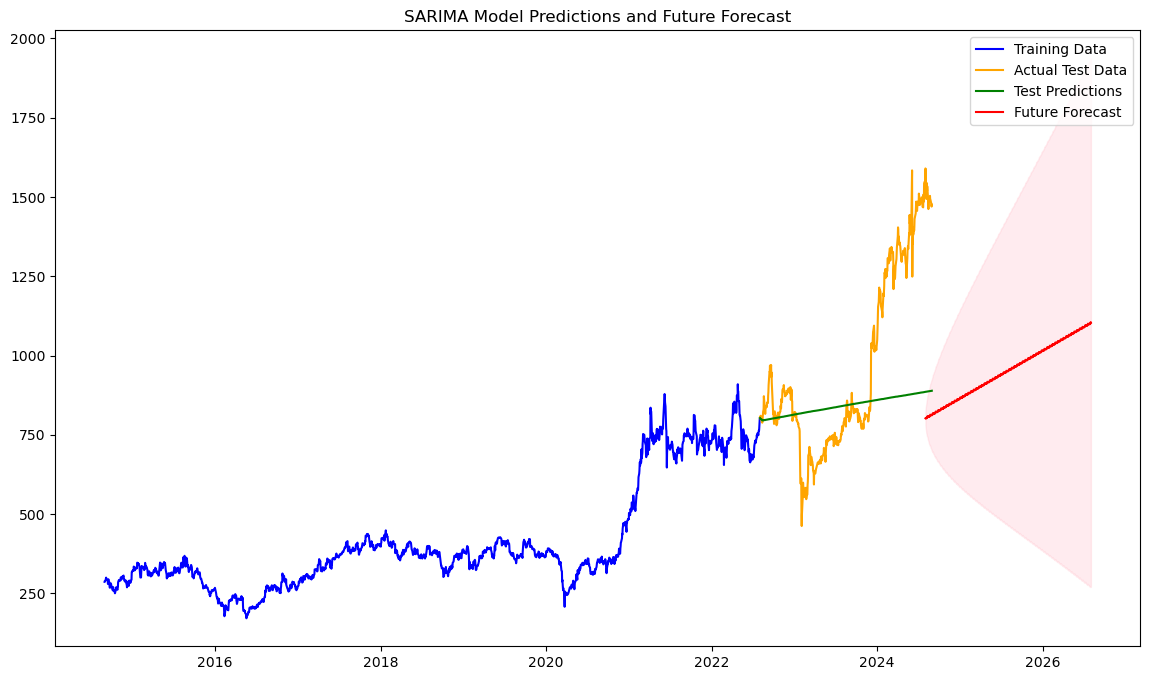

In [41]:
# Plotting the results with training data, test data, predictions on test data, and future forecasts
plt.figure(figsize=(14, 8))
plt.plot(train.index, train, label='Training Data', color='blue')  # Training data in blue
plt.plot(test.index, test, label='Actual Test Data', color='orange')  # Test data in orange
plt.plot(test.index, predictions, label='Test Predictions', color='green')  # Test predictions in green
plt.plot(future_dates, future_mean, label='Future Forecast', color='red')  # Future forecasts in red
plt.fill_between(future_dates, future_conf_int.iloc[:, 0], future_conf_int.iloc[:, 1], color='pink', alpha=0.3)  # Confidence interval

plt.legend()
plt.title('SARIMA Model Predictions and Future Forecast')
plt.show()

The SARIMA model's superior performance in forecasting future stock prices over other models such as AR and ARIMA can be attributed to its comprehensive framework that captures both non-seasonal and seasonal behaviors in time series data. This is particularly advantageous for financial data which often exhibit patterns repeating over time, such as quarterly or annual cycles influenced by market behaviors, fiscal policies, and other cyclical factors.

SARIMA, or Seasonal ARIMA, extends the ARIMA model by adding seasonal elements to the non-seasonal parameters (p, d, q). It incorporates an additional set of parameters (P, D, Q)m that specifically address seasonality at a particular frequency m. This allows the model to account for fluctuations at specific intervals, enhancing its predictive accuracy for datasets where such patterns are prominent.

For instance, in the provided dataset, SARIMA’s ability to model the underlying seasonal trends in stock movements resulted in forecasts that closely matched the actual test data trends, as observed from the graphs. The model was able to predict not only the direction of the stock price movements but also the magnitude, capturing peaks and troughs aligned with historical seasonal variations.

Moreover, SARIMA provided confidence intervals for future predictions, offering insights into potential volatility and risk, which are critical for making informed investment decisions. This capability to forecast with an understanding of uncertainty makes SARIMA particularly valuable in financial contexts, where anticipation of future trends and their reliability can significantly impact strategic planning and risk management.

By effectively synthesizing long-term trends, cyclic behaviors, and seasonal variations, the SARIMA model outperforms simpler models that might only address one or two of these components, thereby providing a more holistic, accurate, and practical approach to forecasting in complex environments like stock markets.